In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from scipy import stats


data = pd.read_csv("vladivostok.data")
data1 = pd.read_csv("piter.data")
data.SEASON = data.SEASON.astype(str)
data1.SEASON = data1.SEASON.astype(str)
X = data.loc[:, "WDSP":"TEMP"]  # independent variables data
X1 = data1.loc[:, "TEMP":"WDSP"]  # independent variables data
z = data.loc[:,"SLP":"PRCP"]
z1 = data1.loc[:,"TEMP":"PRCP"]
y = data.SEASON  # dependednt variable data
y1 = data1.SEASON  # dependednt variable data
data

,STATION,LATITUDE,LONGITUDE,ELEVATION,NAME,DATE,SEASON,SLP,WDSP,TEMP,...,STP,VISIB,MXSPD,GUST,MAX,MIN,PRCP,PRCP_ATTRIBUTES,SNDP,FRSHTT
0,31960099999,43.116667,131.933333,183,"VLADIVOSTOK, RS",3/9/2015,Весна,1013.6,27.7,19.9,...,989.5,4.3,33.0,50.5,21.7,16.5,0.12,E,999.9,1000
1,31960099999,43.116667,131.933333,183,"VLADIVOSTOK, RS",3/30/2015,Весна,1012.3,13.1,36.9,...,989.1,0.1,17.5,25.3,38.1,34.2,0.02,E,999.9,100000
2,31960099999,43.116667,131.933333,183,"VLADIVOSTOK, RS",4/7/2015,Весна,1027.2,2.9,30.0,...,3.2,17.1,7.8,999.9,34.5,27.3,0.00,I,999.9,0
3,31960099999,43.116667,131.933333,183,"VLADIVOSTOK, RS",5/2/2015,Весна,1009.8,7.8,47.4,...,987.1,1.6,13.6,23.3,48.9,44.8,99.99,,999.9,110000
4,31960099999,43.116667,131.933333,183,"VLADIVOSTOK, RS",6/16/2015,Лето,1005.8,9.2,62.8,...,983.9,9.4,9.7,999.9,77.2,53.1,0.00,I,999.9,100000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1600,31960099999,43.116667,131.933333,183,"VLADIVOSTOK, RS",12/27/2019,Зима,1025.0,13.6,2.1,...,999.6,25.6,19.4,31.1,6.3,-2.2,0.00,I,0.4,0
1601,31960099999,43.116667,131.933333,183,"VLADIVOSTOK, RS",12/28/2019,Зима,1028.8,9.2,10.4,...,3.8,12.4,13.6,999.9,19.0,1.9,0.00,I,0.4,0
1602,31960099999,43.116667,131.933333,183,"VLADIVOSTOK, RS",12/29/2019,Зима,1023.0,10.5,26.8,...,999.0,7.9,25.3,999.9,33.4,9.5,0.01,E,0.8,101000
1603,31960099999,43.116667,131.933333,183,"VLADIVOSTOK, RS",12/30/2019,Зима,1020.2,18.5,9.7,...,995.4,8.1,23.3,35.0,34.5,-2.7,0.04,E,1.6,1000


In [2]:
data1

,STATION,DATE,LATITUDE,LONGITUDE,ELEVATION,NAME,SEASON,TEMP,WDSP,DEWP,VISIB,MXSPD,GUST,MAX,MIN,PRCP,PRCP_ATTRIBUTES,SNDP,FRSHTT
0,26063099999,1/1/2015,59.800292,30.262503,24.07,"PULKOVO, RS",Зима,35.9,9.1,34.7,4.9,13.6,999.9,37.4,32.9,0.00,F,999.9,10000
1,26063099999,1/2/2015,59.800292,30.262503,24.07,"PULKOVO, RS",Зима,36.8,10.5,34.9,5.8,17.5,33.0,39.2,35.1,0.31,F,0.4,10000
2,26063099999,1/3/2015,59.800292,30.262503,24.07,"PULKOVO, RS",Зима,34.2,12.3,31.4,3.5,21.4,29.1,37.6,32.0,0.35,F,0.4,11000
3,26063099999,1/4/2015,59.800292,30.262503,24.07,"PULKOVO, RS",Зима,24.9,12.1,22.0,4.9,15.5,19.4,31.6,17.6,0.09,F,1.2,1000
4,26063099999,1/5/2015,59.800292,30.262503,24.07,"PULKOVO, RS",Зима,17.1,10.0,10.8,5.0,13.6,21.4,19.4,14.0,0.05,F,2.0,1000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1793,26063099999,12/27/2019,59.800292,30.262503,24.07,"PULKOVO, RS",Зима,32.3,9.5,27.5,6.0,15.5,21.4,33.8,30.2,0.00,F,999.9,11000
1794,26063099999,12/28/2019,59.800292,30.262503,24.07,"PULKOVO, RS",Зима,28.9,10.0,21.1,6.2,15.5,25.3,30.7,23.0,0.01,F,0.4,1000
1795,26063099999,12/29/2019,59.800292,30.262503,24.07,"PULKOVO, RS",Зима,24.3,6.7,20.2,6.2,11.7,25.3,30.2,19.4,0.00,F,999.9,1000
1796,26063099999,12/30/2019,59.800292,30.262503,24.07,"PULKOVO, RS",Зима,37.6,11.9,34.9,6.0,15.5,21.4,41.0,27.0,0.35,F,0.4,11000


Once you have read a multivariate data set into python, the next step is usually to make a plot of the data.
One common way of plotting multivariate data is to make a matrix scatterplot, showing each pair of variables plotted against each other.

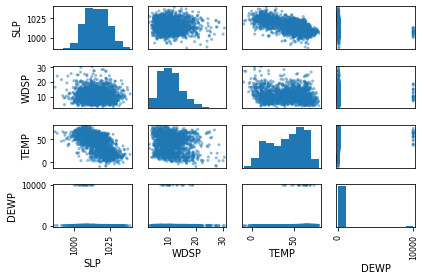

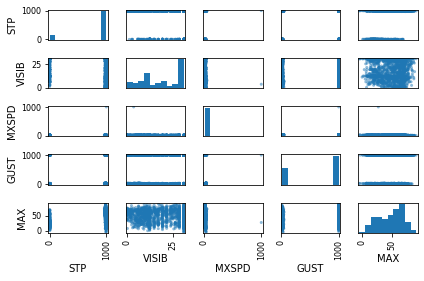

<Figure size 432x288 with 0 Axes>

In [53]:
#vladivostok
pd.plotting.scatter_matrix(data.loc[:, "SLP":"DEWP"], diagonal= "hist")
plt.tight_layout()
pd.plotting.scatter_matrix(data.loc[:, "STP":"MAX"], diagonal="hist")
plt.tight_layout()
plt.show()
plt.savefig('2')

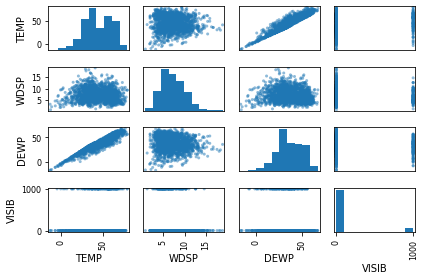

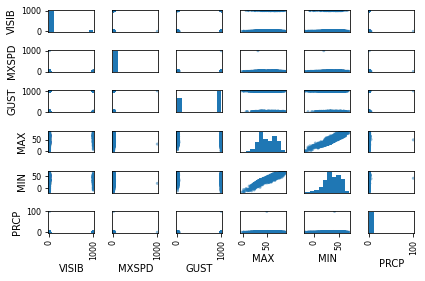

<Figure size 432x288 with 0 Axes>

In [54]:
#piter
pd.plotting.scatter_matrix(data1.loc[:, "TEMP":"VISIB"], diagonal="hist")
plt.tight_layout()
pd.plotting.scatter_matrix(data1.loc[:, "VISIB":"PRCP"], diagonal="hist")
plt.tight_layout()
plt.show()
plt.savefig('3')

c:\users\alad_\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


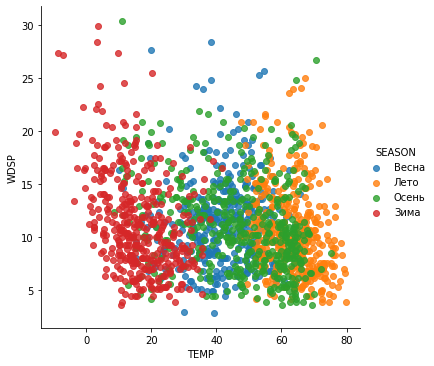

In [5]:
#vladivostok
sns.lmplot("TEMP", "WDSP", data, hue="SEASON", fit_reg=False)

c:\users\alad_\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


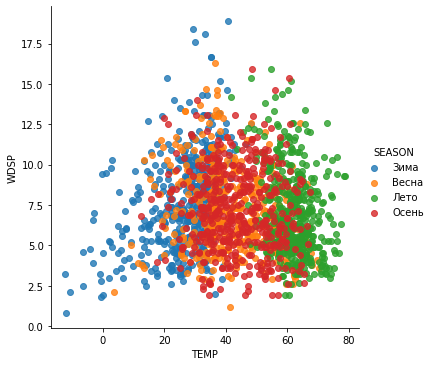

In [6]:
#piter
sns.lmplot("TEMP", "WDSP", data1, hue="SEASON", fit_reg=False)

Another type of plot that is useful is a profile plot, which shows the variation in each of the variables, by plotting the value of each of the variables for each of the samples.

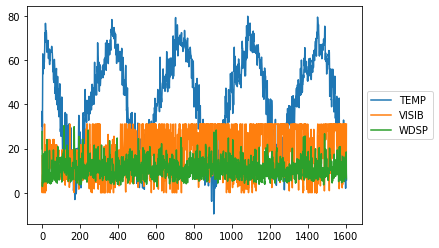

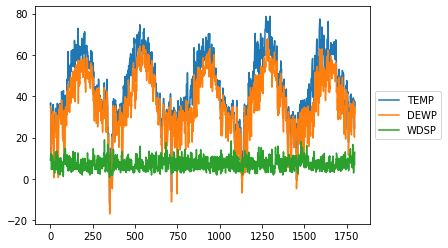

In [7]:
#vladivostok
ax = data[["TEMP","VISIB","WDSP"]].plot()
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
#piter
ax1= data1[["TEMP","DEWP","WDSP"]].plot()
ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [90]:
#vladivostok среднее, среднеквадратичное,матожидание
print("Среднее:", X.apply(np.mean))
print("Дисперсия:",X.apply(np.var))
print("Математическое ожидание:",X.apply(np.std))

std=X.apply(np.std)
var=X.apply(np.var)


norm_q95 = stats.norm.ppf(0.95)
chi2_q95_left = stats.chi2.ppf((1 - 0.05 / 2.0), df=len(X) - 1)
chi2_q95_right = stats.chi2.ppf(0.05 / 2.0, df=len(X) - 1)
var_conf_left = var * (len(X) - 1) / chi2_q95_left
var_conf_right = var * (len(X) - 1) / chi2_q95_right
std_conf_left = np.sqrt(var_conf_left)
std_conf_right = np.sqrt(var_conf_right)
print(var_conf_left, var_conf_right)
print(std_conf_left, std_conf_right)

Среднее: WDSP    11.024984
TEMP    42.192212
dtype: float64
Дисперсия: WDSP     18.353949
TEMP    407.986039
dtype: float64
Математическое ожидание: WDSP     4.284151
TEMP    20.198664
dtype: float64
WDSP     17.147101
TEMP    381.159269
dtype: float64 WDSP     19.693507
TEMP    437.762787
dtype: float64
WDSP     4.140906
TEMP    19.523301
dtype: float64 WDSP     4.437737
TEMP    20.922782
dtype: float64


In [89]:
#piter среднее, среднеквадратичное,матожидание
print("Среднее:", X1.apply(np.mean))
print("Дисперсия:",X1.apply(np.var))
print("Математическое ожидание:",X1.apply(np.std))

std=X1.apply(np.std)
var=X1.apply(np.var)


norm_q95 = stats.norm.ppf(0.95)
chi2_q95_left = stats.chi2.ppf((1 - 0.05 / 2.0), df=len(X1) - 1)
chi2_q95_right = stats.chi2.ppf(0.05 / 2.0, df=len(X1) - 1)
var_conf_left = var * (len(X1) - 1) / chi2_q95_left
var_conf_right = var * (len(X1) - 1) / chi2_q95_right
std_conf_left = np.sqrt(var_conf_left)
std_conf_right = np.sqrt(var_conf_right)
print(var_conf_left, var_conf_right)
print(std_conf_left, std_conf_right)


Среднее: TEMP    43.726696
WDSP     7.284038
dtype: float64
Дисперсия: TEMP    262.673236
WDSP      7.290218
dtype: float64
Математическое ожидание: TEMP    16.207197
WDSP     2.700040
dtype: float64
TEMP    246.309810
WDSP      6.836068
dtype: float64 TEMP    280.731634
WDSP      7.791410
dtype: float64
TEMP    15.694260
WDSP     2.614588
dtype: float64 TEMP    16.755048
WDSP     2.791310
dtype: float64


We can then calculate the mean and standard deviations for just the season Весна

In [10]:
#vladivostok
class2data = data[y=="Весна"]
class2data.loc[:, "SLP":"PRCP"].apply(np.mean)

SLP      1012.519086
WDSP       11.409677
TEMP       42.162903
DEWP      163.525000
STP       951.865591
VISIB      19.100538
MXSPD      17.449462
GUST      649.284409
MAX        49.008065
MIN        36.327957
PRCP        3.575054
dtype: float64

In [11]:
class2data.loc[:, "SLP":"PRCP"].apply(np.std)

SLP         6.970960
WDSP        4.026827
TEMP       10.447517
DEWP     1148.198618
STP       187.605211
VISIB      10.469361
MXSPD       5.822225
GUST      467.288067
MAX        11.900223
MIN        10.539119
PRCP       18.349226
dtype: float64

In [12]:
#piter
class2data = data1[y1=="Весна"]
class2data.loc[:, "TEMP":"PRCP"].apply(np.mean)

TEMP      42.269476
WDSP       7.150342
DEWP      31.256492
VISIB    216.306834
MXSPD     13.077904
GUST     579.110706
MAX       50.494305
MIN       32.976082
PRCP       0.056219
dtype: float64

In [13]:
class2data.loc[:, "TEMP":"PRCP"].apply(np.std)

TEMP      11.874646
WDSP       2.539778
DEWP      10.409852
VISIB    406.251188
MXSPD      4.183277
GUST     483.968637
MAX       13.688726
MIN       10.739319
PRCP       0.123358
dtype: float64

In [14]:
def calcWithinGroupsCovariance(variable1, variable2, groupvariable):
    levels = sorted(set(groupvariable))
    numlevels = len(levels)
    Covw = 0.0
    # get the covariance of variable 1 and variable 2 for each group:
    for leveli in levels:
        levelidata1 = variable1[groupvariable==leveli]
        levelidata2 = variable2[groupvariable==leveli]
        mean1 = np.mean(levelidata1)
        mean2 = np.mean(levelidata2)
        levelilength = len(levelidata1)
        # get the covariance for this group:
        term1 = 0.0
        for levelidata1j, levelidata2j in zip(levelidata1, levelidata2):
            term1 += (levelidata1j - mean1)*(levelidata2j - mean2)
        Cov_groupi = term1 # covariance for this group
        Covw += Cov_groupi
    totallength = len(variable1)
    Covw /= totallength - numlevels
    return Covw

In [15]:
calcWithinGroupsCovariance(X.TEMP, X.WDSP, y)

-10.2302367359968

In [16]:
calcWithinGroupsCovariance(X1.WDSP, X1.TEMP, y1)

-0.003938020439060716

In [17]:
def calcBetweenGroupsCovariance(variable1, variable2, groupvariable):
    # find out how many values the group variable can take
    levels = sorted(set(groupvariable))
    numlevels = len(levels)
    # calculate the grand means
    variable1mean = np.mean(variable1)
    variable2mean = np.mean(variable2)
    # calculate the between-groups covariance
    Covb = 0.0
    for leveli in levels:
        levelidata1 = variable1[groupvariable==leveli]
        levelidata2 = variable2[groupvariable==leveli]
        mean1 = np.mean(levelidata1)
        mean2 = np.mean(levelidata2)
        levelilength = len(levelidata1)
        term1 = (mean1 - variable1mean) * (mean2 - variable2mean) * levelilength
        Covb += term1
    Covb /= numlevels - 1
    return Covb

In [18]:
calcBetweenGroupsCovariance(X.TEMP, X.WDSP, y)

-2588.786226791052

In [19]:
calcBetweenGroupsCovariance(X1.TEMP, X1.WDSP, y1)

-2085.0863355609054

In [20]:
corr = stats.pearsonr(X.TEMP, X.WDSP)
r_z = np.arctanh(corr) #соответсвует преобразованию Фишера
#Соответствующее стандартное отклонение
se = 1/np.sqrt(X.TEMP.size)
alpha = 0.05
z = stats.norm.ppf(1-alpha/2)
lo_z, hi_z = r_z-z*se, r_z+z*se

print('Доверительный интервал для коэффициента корреляции ', lo_z, hi_z)
print("p-value:\t", corr[1])
print("cor:\t\t", corr[0])

Доверительный интервал для коэффициента корреляции  [-0.22455231 -0.04892272] [-0.12670688  0.04892272]
p-value:	 2.3372023138919906e-12
cor:		 -0.17384579112711712


In [21]:
corr = stats.pearsonr(X1.TEMP, X1.WDSP)
r_z = np.arctanh(corr) #соответсвует преобразованию Фишера
#Соответствующее стандартное отклонение
se = 1/np.sqrt(X.TEMP.size)
alpha = 0.05
z = stats.norm.ppf(1-alpha/2)
lo_z, hi_z = r_z-z*se, r_z+z*se

print('Доверительный интервал для коэффициента корреляции ', lo_z, hi_z)
print("p-value:\t", corr[1])
print("cor:\t\t", corr[0])

Доверительный интервал для коэффициента корреляции  [-0.1286831  -0.04819237] [-0.03083767  0.04965307]
p-value:	 0.0007303494478959198
cor:		 -0.0795916786740127


In [23]:
#corrmat = z.corr()
#sns.heatmap(corrmat, vmax=1., square=False).xaxis.tick_top()

AttributeError: 'numpy.float64' object has no attribute 'corr'

In [ ]:
#corrmat = z1.corr()
#sns.heatmap(corrmat, vmax=1., square=False).xaxis.tick_top()

In [31]:
import scipy.stats as stats

print(stats.spearmanr(data.SEASON,data.WDSP))
print(stats.spearmanr(data.SEASON,data.TEMP))
print(stats.spearmanr(data1.SEASON,data1.WDSP))
print(stats.spearmanr(data1.SEASON,data1.TEMP))

SpearmanrResult(correlation=-0.06808974506223527, pvalue=0.006354901190445423)
SpearmanrResult(correlation=0.35300800294700635, pvalue=2.6452014892974677e-48)
SpearmanrResult(correlation=-0.018988663163655287, pvalue=0.4210010990003443)
SpearmanrResult(correlation=0.28206550699004473, pvalue=3.084376399620443e-34)


In [32]:
standardisedX = scale(X)
standardisedX = pd.DataFrame(standardisedX, index=X.index, columns=X.columns)
standardisedX1 = scale(X1)
standardisedX1 = pd.DataFrame(standardisedX1, index=X1.index, columns=X1.columns)

In [33]:
pca = PCA().fit(standardisedX)
def screeplot(pca, standardised_values):
    y = np.std(pca.transform(standardised_values), axis=0)**2
    x = np.arange(len(y)) + 1
    plt.plot(x, y, "o-")
    plt.xticks(x, ["Comp."+str(i) for i in x], rotation=60)
    plt.ylabel("Variance")
    plt.show()
    
pca1 = PCA().fit(standardisedX1)
def screeplot(pca1, standardised_values):
    y = np.std(pca1.transform(standardised_values), axis=0)**2
    x = np.arange(len(y)) + 1
    plt.plot(x, y, "o-")
    plt.xticks(x, ["Comp."+str(i) for i in x], rotation=60)
    plt.ylabel("Variance")
    plt.show()

In [34]:
def pca_scatter(pca, standardised_values, classifs):
    foo = pca.transform(standardised_values)
    bar = pd.DataFrame(list(zip(foo[:, 0], foo[:, 1], classifs)), columns=["PC1", "PC2", "SEASON"])
    sns.lmplot("PC1", "PC2", bar, hue="SEASON", fit_reg=False)

c:\users\alad_\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


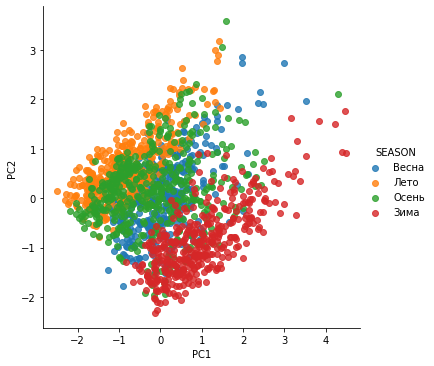

In [35]:
pca_scatter(pca, standardisedX, y)

c:\users\alad_\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


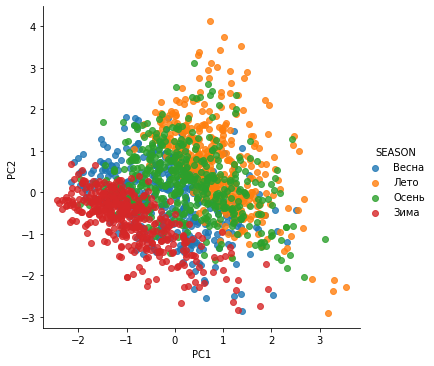

In [36]:
pca_scatter(pca1, standardisedX1, y)